## Concrete Compressive Strength Prediction


#### Life cycle of this Project

- Understanding the Problem Statement
- Collection of Data
- Data Checks to perform
- Exploratory Data Analysis
- Pre-Process the Data 
- Train the models
- Choose best model

### 1) Problem statement
- The quality of concrete is determined by its compressive strength, which is measured
    using a conventional crushing test on a concrete cylinder. The strength of the concrete
    is also a vital aspect in achieving the requisite longevity. It will take 28 days to test
    strength, which is a long period. So, what will we do now? We can save a lot of time and
    effort by using Data Science to estimate how much quantity of which raw material we
    need for acceptable compressive strength.

### 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
- The data consists of 9 columns and 1030 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/concrete_data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Shape of the dataset

In [4]:
df.shape

(1030, 9)

### 2.2 Dataset information

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

- Fly Ash (component 3) -- quantitative  -- kg in a m3 mixture -- Input Variable

- Water  (component 4) -- quantitative  -- kg in a m3 mixture -- Input Variable

- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

- Coarse Aggregate  (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

- Fine Aggregate (component 7)	 -- quantitative  -- kg in a m3 mixture -- Input Variable

- Age -- quantitative  -- Day (1~365) -- Input Variable

-- Concrete compressive strength -- quantitative -- MPa -- Output Variable


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates and Drop them from dataframe

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(1005, 9)

### 3.3 Check data types

In [22]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1005 non-null   float64
 1   blast_furnace_slag             1005 non-null   float64
 2   fly_ash                        1005 non-null   float64
 3   water                          1005 non-null   float64
 4   superplasticizer               1005 non-null   float64
 5   coarse_aggregate               1005 non-null   float64
 6   fine_aggregate                 1005 non-null   float64
 7   age                            1005 non-null   int64  
 8   concrete_compressive_strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


### 3.4 Checking the number of unique values of each column

In [23]:
df.nunique()

cement                           278
blast_furnace_slag               185
fly_ash                          156
water                            195
superplasticizer                 111
coarse_aggregate                 284
fine_aggregate                   302
age                               14
concrete_compressive_strength    845
dtype: int64

### 3.5 Check statistics of data set

In [24]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Insight
- From above description of data, all means are varies.
- All standard deviations are also different.
- While there is a minimum score  2.33 for concrete_compressive_strength and maximum 82.60

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

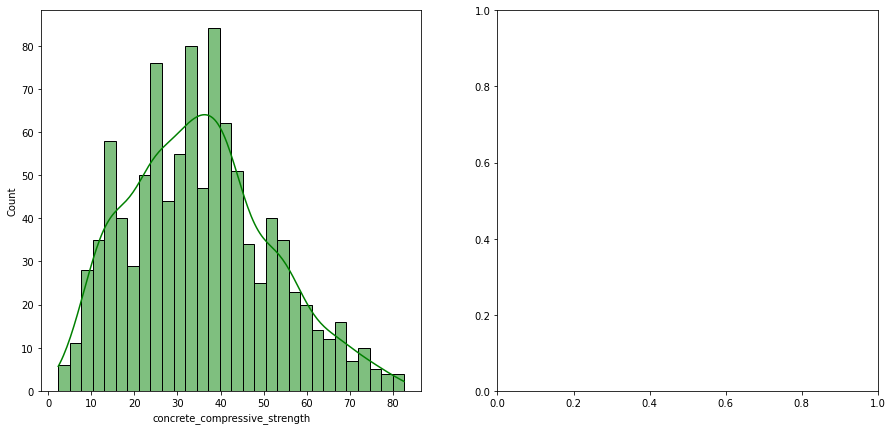

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='concrete_compressive_strength',bins=30,kde=True,color='g')
# plt.subplot(122)
# sns.histplot(data=df,x='concrete_compressive_strength',kde=True,hue='cement')
# plt.show()

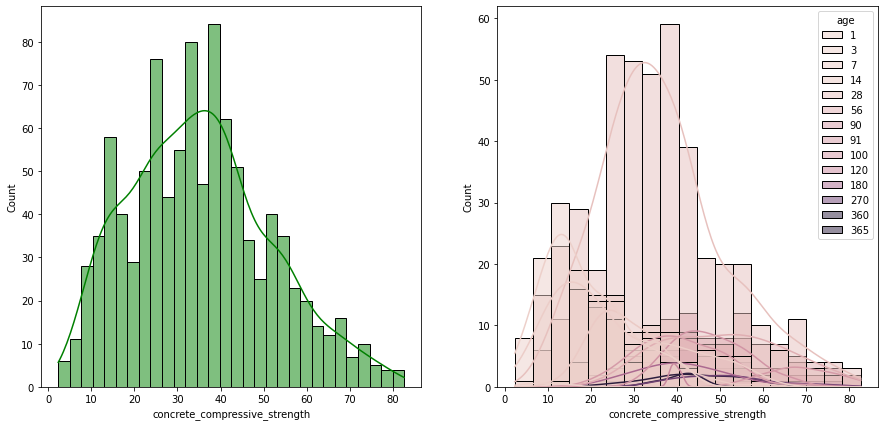

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='concrete_compressive_strength',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='concrete_compressive_strength',kde=True,hue='age')
plt.show()

#### 4.4 Feature Wise Visualization


#### 4.4.6 CHECKING OUTLIERS

In [39]:
# plt.subplots(1,4,figsize=(16,5))
# plt.subplot(141)
# sns.boxplot(df['cement'],color='skyblue')
# plt.subplot(142)
# sns.boxplot(df['blast_furnace_slag'],color='hotpink')
# plt.subplot(143)
# sns.boxplot(df['fly_ash'],color='yellow')
# plt.subplot(144)
# sns.boxplot(df['water'],color='lightgreen')
# plt.subplot(145)
# sns.boxplot(df['superplasticizer'],color='black')
# plt.subplot(146)
# sns.boxplot(df['coarse_aggregate'],color='blue')
# plt.subplot(147)
# sns.boxplot(df['fine_aggregate'],color='orange')
# plt.subplot(148)
# sns.boxplot(df['age'],color='purple')
# plt.subplot(149)
# sns.boxplot(df['concrete_compressive_strength'],color='red')

# plt.show()